# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib. 

First thing, Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# next load the data
df = pd.read_csv('final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,1


In [3]:
# check the shape of the dataset
df.shape

(1863, 14)

## Linear Regression Model

In [4]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [11]:
# seperate input features in x
x = df.drop('price', axis = 1)

# store the target variable in y
y = df['price']

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [14]:
# import module
from sklearn.model_selection import train_test_split

# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20)

In [16]:
# check the split using shape
xtrain.shape, ytrain.shape

((1490, 13), (1490,))

In [17]:
# train your model
lrmodel = LinearRegression().fit(xtrain,ytrain)

In [18]:
# check the coefficients and intercept
lrmodel.coef_

array([ 7.36727040e+03, -4.41867762e+02,  2.23841015e+03,  8.81676771e+03,
        7.92182430e+03,  3.12472317e+01,  4.04470881e+03,  2.01553845e-01,
       -1.23248182e+04, -5.67689220e+03, -4.78297409e+04,  3.32256159e+03,
       -1.82946152e+04])

In [19]:
lrmodel.intercept_

-22665221.11462891

In [24]:
# make predictions on test set
ypred = lrmodel.predict(xtest)


In [23]:
#ypred

In [26]:
# import MAE for evaluating the model
from sklearn.metrics import mean_absolute_error


In [27]:
test_mae = mean_absolute_error(ypred,ytest)

In [29]:
# evaluate the model
print('Test error is', test_mae)

Test error is 89166.0276105644


## How would you know if your model is generalized/overfit/underfit?

In [30]:
ytrainpred = lrmodel.predict(xtrain)

In [31]:
train_mae = mean_absolute_error(ytrainpred,ytrain)

In [32]:
# evaluate the model
print('Test error is', train_mae)

Test error is 85890.87292839188


## Is your model good? What did the business ask?

## Decision Trees

In [33]:
# import Decision Tree model
from sklearn.tree import DecisionTreeRegressor

In [53]:
# create an instane of the model
dt = DecisionTreeRegressor(max_depth = 4, max_features=10)

In [54]:
# train the model
dtmodel = dt.fit(xtrain,ytrain)

In [55]:
# make predictions on the test set
dt_ypred = dtmodel.predict(xtest)

In [56]:
# Evaluate the model
dt_test_mae = mean_absolute_error(dt_ypred,ytest)

print('Test error is', dt_test_mae)

Test error is 60449.11560965929


In [57]:
# make predictions on the test set
dt_ytrainpred = dtmodel.predict(xtrain)

In [58]:
# Evaluate the model
dt_train_mae = mean_absolute_error(dt_ytrainpred,ytrain)

print('Test error is', dt_train_mae)

Test error is 57159.085141531585


## Plot the Tree

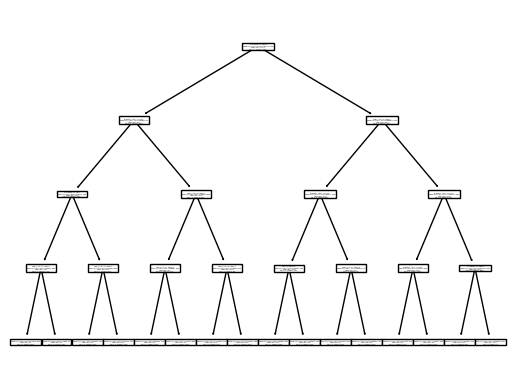

In [59]:
# plot the tree
from sklearn import tree

# Plot the tree with feature names
tree.plot_tree(dtmodel, feature_names=dtmodel.feature_names_in_)

#tree.plot_tree(dtmodel)
#plt.show(dpi=300)

# Save the plot to a file
plt.savefig('tree.png', dpi=300)

In [62]:
dtmodel.feature_names_in_

array(['year_sold', 'property_tax', 'insurance', 'beds', 'baths', 'sqft',
       'year_built', 'lot_size', 'basement', 'popular', 'recession',
       'property_age', 'property_type_Condo'], dtype=object)

In [65]:
dtmodel.feature_importances_

array([0.28292785, 0.18449047, 0.51442208, 0.        , 0.        ,
       0.01100672, 0.00715288, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

## Random Forest

In [67]:
# import Random Forest model
from sklearn.ensemble import RandomForestRegressor

In [72]:
# Create an instance of the model
rf = RandomForestRegressor(n_estimators=80, max_depth=4, max_features=7)

In [73]:
# train the model
rfmodel = rf.fit(xtrain,ytrain)

In [74]:
# Make predictions
rf_ypred = rfmodel.predict(xtest)

In [75]:
# evaluate the model
rf_mae = mean_absolute_error(rf_ypred,ytest)

print('Test error is', rf_mae)

Test error is 56364.25950118755


In [76]:
# Make predictions
rf_ytrainpred = rfmodel.predict(xtrain)

In [77]:
rftrain_mae = mean_absolute_error(rf_ytrainpred,ytrain)

print('Test error is', rftrain_mae)

Test error is 53695.50182659182


# Saving your model

  ## Pickle: 

* The pickle module implements a powerful algorithm for serializing and de-serializing a Python object structure. 

* The saving of data is called Serialization, and loading the data is called De-serialization.

**Pickle** model provides the following functions:
* **`pickle.dump`** to serialize an object hierarchy, you simply use `dump()`. 
* **`pickle.load`** to deserialize a data stream, you call the `loads()` function.  

In [78]:
import pickle

In [79]:
# save the model
pickle.dump(rfmodel,open('RF_MODEL','wb'))

In [83]:
# Load Model
model = pickle.load(open('RF_MODEL','rb'))

In [84]:
# Make predictions using the model
model.predict([[2013,234,81,1,1,584,2013,0,0,0,1,0,1]])

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([294748.52245495])